# Behavioural analysis

## Preparing the data

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Loading the data:

In [31]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcvct'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p0_s1_2016-10-18_1556
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p0_s2_2016-10-25_1649
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p0_s3_2016-10-25_1700
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p1_s1_2016-10-25_1101
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p1_s2_2016-10-25_1110
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p1_s3_2016-10-25_1125
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p2_s1_2016-11-01_1504
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p2_s2_2016-11-01_1519
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p2_s3_2016-11-01_1528
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p3_s2_2016-11-01_1414
C:\Users\Egor\Dropbox\Projects\mc\data\mcvct\mcvct_p3_s3_2016-11-01_1424
(1056, 39)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL',
       u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR',
       u'BvL', u'BvR', u'BsfL', 

Transforming the data set first.

In [32]:
ds.vR = np.round(ds.vR*60/35,1)
ds.vL = np.round(ds.vL*60/35,1)
ds['vDiffR'] = ds['vR'] - ds['vL']
ds['nfR'] = ds['nf000'] - ds['nf180']
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
ds.ix[ds['dirL']==0,'v000'] = ds['vL']
ds.ix[ds['dirR']==0,'v000'] = ds['vR']
ds.ix[ds['dirL']==180,'v180'] = ds['vL']
ds.ix[ds['dirR']==180,'v180'] = ds['vR']
print ds.head(5)
#df = pd.melt(ds, id_vars=['trialN','dirL','dirR','vL','vR','colorNameL','colorNameR','fovGap'],
#             value_vars=['pd000','pd090','pd180','pd270'])
#df = df.rename(columns={'variable': 'angle', 'value': 'predominance'})
#print df.head(5)

     expName             time  participant  session  trialN  dirL  dirR   vL  \
0  mcvct_bv0  2016-10-18_1556            0        1       1   180     0  1.0   
1  mcvct_bv0  2016-10-18_1556            0        1       2     0   180  2.1   
2  mcvct_bv0  2016-10-18_1556            0        1       3     0   180  8.2   
3  mcvct_bv0  2016-10-18_1556            0        1       4     0   180  8.2   
4  mcvct_bv0  2016-10-18_1556            0        1       5     0   180  4.1   

     vR  szL  ...      pd000  pd090  pd180     pd270  qnResp      ringSz  \
0   8.2  256  ...   0.000000    0.0    0.0  0.016667       0   25.800000   
1   4.1  256  ...   0.016667    0.0    0.0  0.000000       0   99.514286   
2  16.5  256  ...   0.016667    0.0    0.0  0.000000       0  136.371429   
3   0.5  256  ...   0.000000    0.0    0.0  0.016667       0  136.371429   
4   0.0  256  ...   0.000000    0.0    0.0  0.016667       0  136.371429   

   vDiffR  nfR  v000  v180  
0     7.2    0   8.2   1.0  
1   

These plots show the speed at which the directional predominance was indicated the most (in terms of proportion).

    v000  participant  sum      mean       std  size
0    0.0            0    1  0.027778  0.166667    36
1    0.0            1    0  0.000000  0.000000    36
2    0.0            2    0  0.000000  0.000000    36
3    0.0            3    0  0.000000  0.000000    24
4    0.5            0    1  0.023810  0.154303    42
5    0.5            1    0  0.000000  0.000000    42
6    0.5            2    0  0.000000  0.000000    42
7    0.5            3    0  0.000000  0.000000    28
8    1.0            0    1  0.023810  0.154303    42
9    1.0            1    0  0.000000  0.000000    42
10   1.0            2    0  0.000000  0.000000    42
11   1.0            3    0  0.000000  0.000000    28
12   2.1            0   18  0.428571  0.500870    42
13   2.1            1   12  0.285714  0.457230    42
14   2.1            2    2  0.047619  0.215540    42
15   2.1            3    0  0.000000  0.000000    28
16   4.1            0   13  0.309524  0.467901    42
17   4.1            1   16  0.380952  0.491507

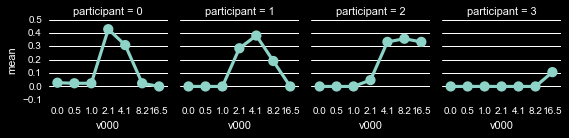

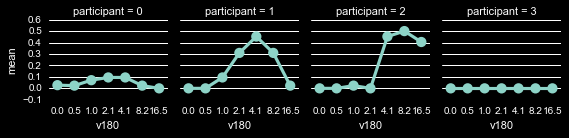

In [33]:
sumR = ds.groupby(['v000','participant'], as_index=False)['nf000'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumL = ds.groupby(['v180','participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print sumR
g = sns.factorplot(x='v000', y='mean', col='participant', data=sumR, size=2)
g = sns.factorplot(x='v180', y='mean', col='participant', data=sumL, size=2)

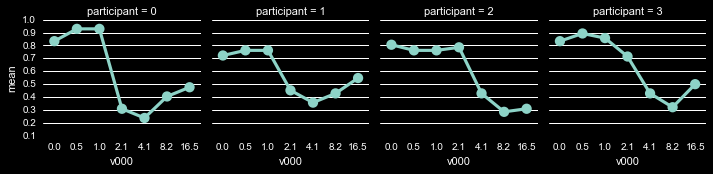

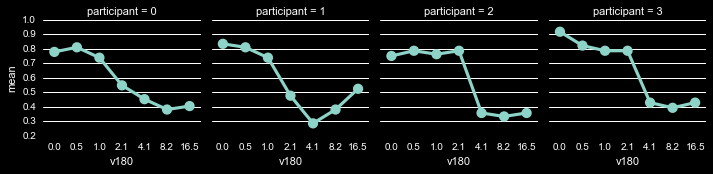

In [34]:
sumDR = ds.groupby(['v000','participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumDL = ds.groupby(['v180','participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
#sumDR['nf270','v000'] = sumDR['v000']
#sumDL['nf270','v180'] = sumDL['v180']
g = sns.factorplot(x='v000', y='mean', col='participant', data=sumDR, size=2.5)
g = sns.factorplot(x='v180', y='mean', col='participant', data=sumDL, size=2.5)

Looking at the instances of when the ring occurred vs. when it didn't (proportion), and large was the resulting ring in those instances (mean ring size).

In [103]:
# Rewring the ring size column so that the minimum size is equated to zero:
ds.ix[ds['ringSz']==25.8,'ringSz'] = 0
# Creating columns for the slower and faster of the two speeds:
ds['vMin'] = np.amin([ds['vL'], ds['vR']], axis=0)
ds['vMax'] = np.amax([ds['vL'], ds['vR']], axis=0)

ds['ringSzDeg'] = np.round(ds.ringSz/35,1)
ds.ix[ds['ringSz']==0,'ringSzDeg'] = 7.4
ds['slow'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMin),'slow'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMin),'slow'] = 1
ds.ix[ds.nf270==1,'slow'] = 1
ds['fast'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMax),'fast'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMax),'fast'] = 1
ds['vDiff'] = np.round(ds.vMax-ds.vMin,0)
ssRing = ds[ds.ring==1]
ssNoRing = ds[ds.ring==0]

### Occurrence of center-surround as a function of speed combinations

(-0.1, 1.1)

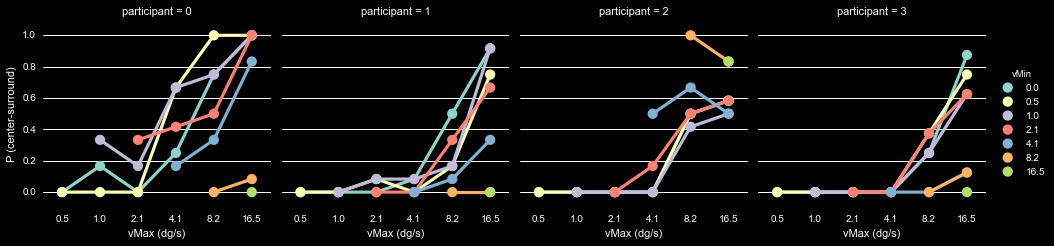

In [84]:
ds['ring'] = 0
ds.ix[ds.ringSz!=0,'ring'] = 1
g = sns.factorplot(x='vMax', y='ring', hue='vMin', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dg/s)','P (center-surround)')
plt.ylim(-0.1,1.1)

Center-surround effect is associated with higher maximum speeds.

(-0.1, 1.1)

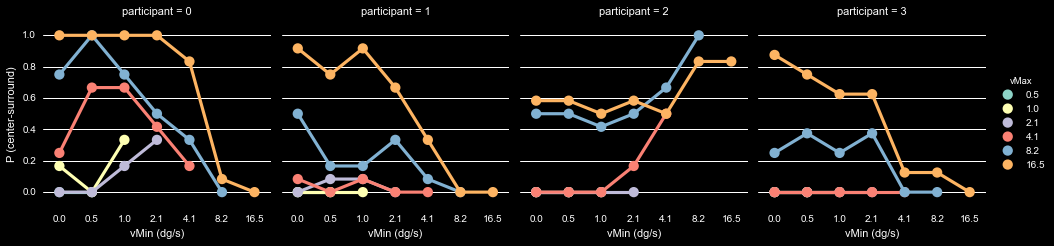

In [85]:
g = sns.factorplot(x='vMin', y='ring', hue='vMax', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dg/s)','P (center-surround)')
plt.ylim(-0.1,1.1)

For three out of four subjects, it is associated with lower minimum speeds.

Generally, the greater the difference between two speeds, the more likely it is to observe the effect.

## Center size for different speed combinations

In [ ]:
g = sns.factorplot(x='vMin', y='ring', hue='vMax', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dg/s)','P (center-surround)')
plt.ylim(-0.1,1.1)

(-0.5, 8)

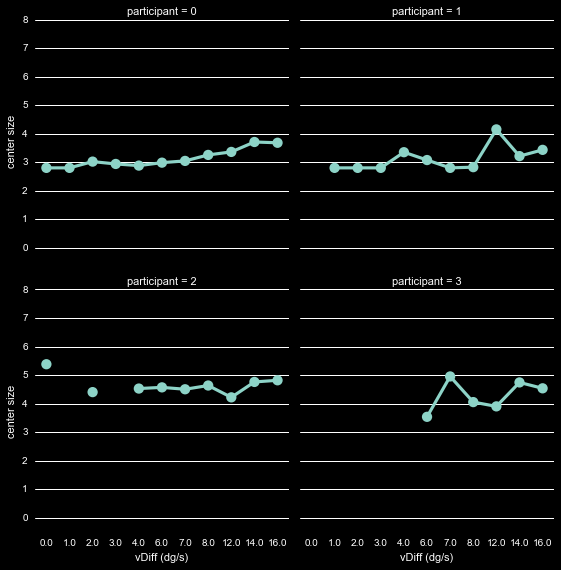

In [102]:
g = sns.factorplot(x='vDiff', y='ringSzDeg', col='participant', data=ssRing, 
               col_wrap=2, size=4, ci=None)
g.set_axis_labels('vDiff (dg/s)','center size')
plt.ylim(-0.5,8)
#g.set(xlabel='vMin (dg/s)', ylabel='Center Size')
#g.fig.get_axes()[0].legend(title='vMax (dg/s)')

 Generally, slightly larger center size with increased difference between the two competing speeds.

### Type of response as a function of velocity in center-surround trials

#### As a function of maximum velocity

(-0.1, 1.1)

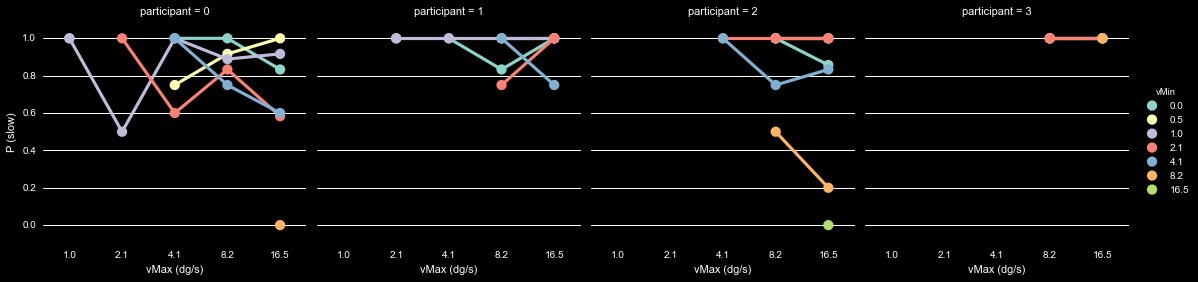

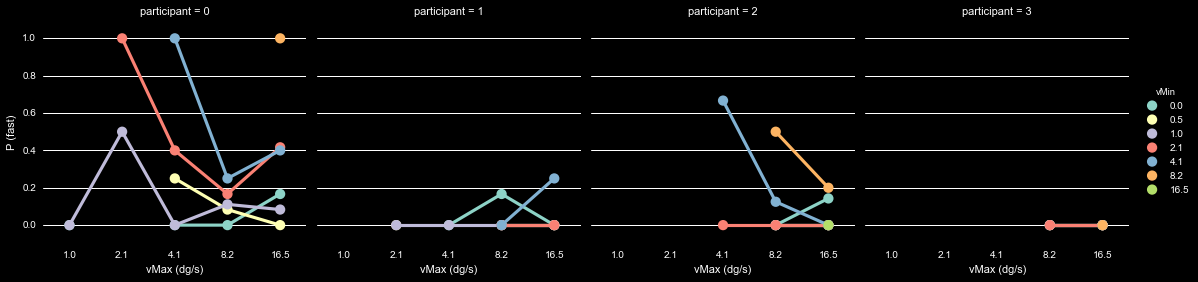

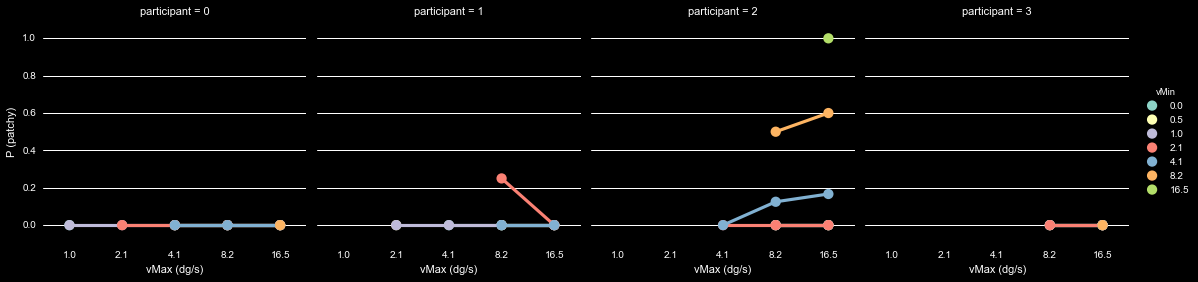

In [106]:
g = sns.factorplot(x='vMax', y='slow', hue='vMin', col='participant', col_wrap=4,
                   data=ssRing, ci=None, dodge=.0)
g.set_axis_labels('vMax (dg/s)','P (slow)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='fast', hue='vMin', col='participant', col_wrap=4,
                   data=ssRing, ci=None, dodge=.0)
g.set_axis_labels('vMax (dg/s)','P (fast)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='nf090', hue='vMin', col='participant', col_wrap=4,
                   data=ssRing, ci=None, dodge=.0)
g.set_axis_labels('vMax (dg/s)','P (patchy)')
plt.ylim(-0.1,1.1)

Faster maximum speed generally associated with greater proportion of slow-center responses.

#### As a function of minimum velocity

(-0.1, 1.1)

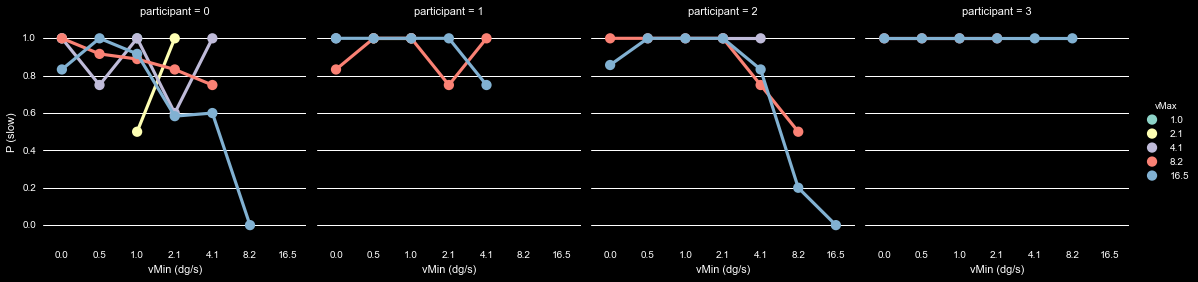

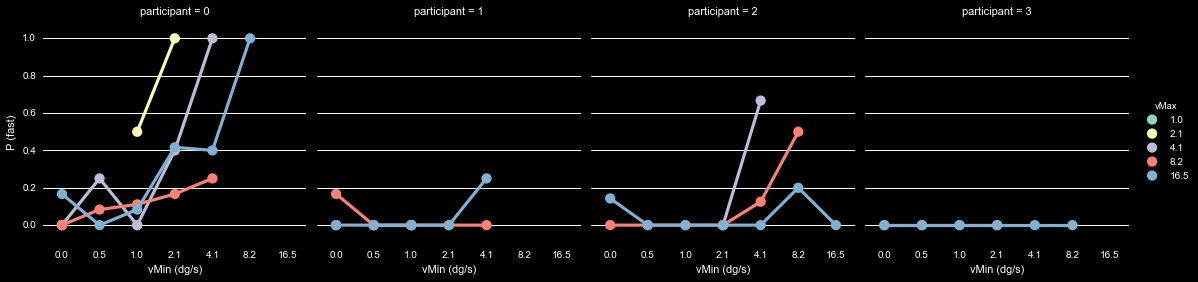

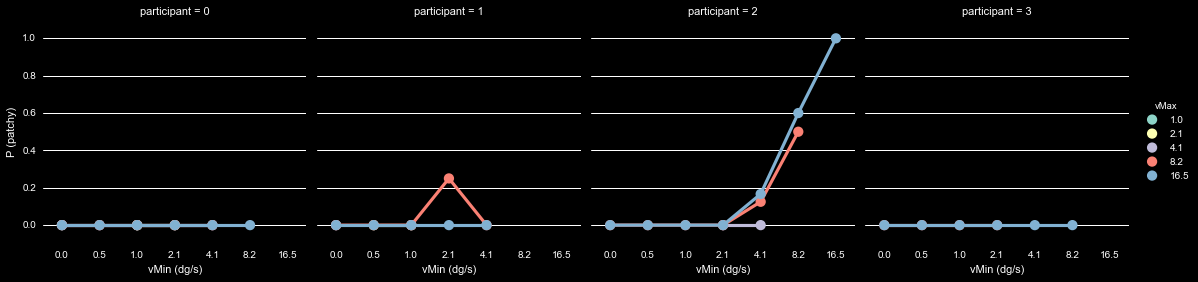

In [107]:
g = sns.factorplot(x='vMin', y='slow', hue='vMax', col='participant', col_wrap=4,
                   data=ssRing, ci=None, dodge=.0)
g.set_axis_labels('vMin (dg/s)','P (slow)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMin', y='fast', hue='vMax', col='participant', col_wrap=4,
                   data=ssRing, ci=None, dodge=.0)
g.set_axis_labels('vMin (dg/s)','P (fast)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMin', y='nf090', hue='vMax', col='participant', col_wrap=4,
                   data=ssRing, ci=None, dodge=.0)
g.set_axis_labels('vMin (dg/s)','P (patchy)')
plt.ylim(-0.1,1.1)

For two participants, faster minimum speed is associated with fewer slow center responses, and more fast & patchy responses.

### Type of response as a function of velocity in whole-field trials

#### As a function of maximum velocity

(-0.1, 1.1)

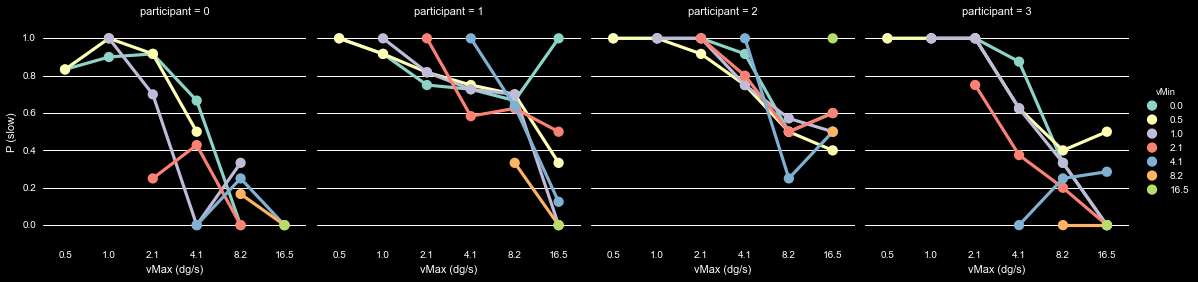

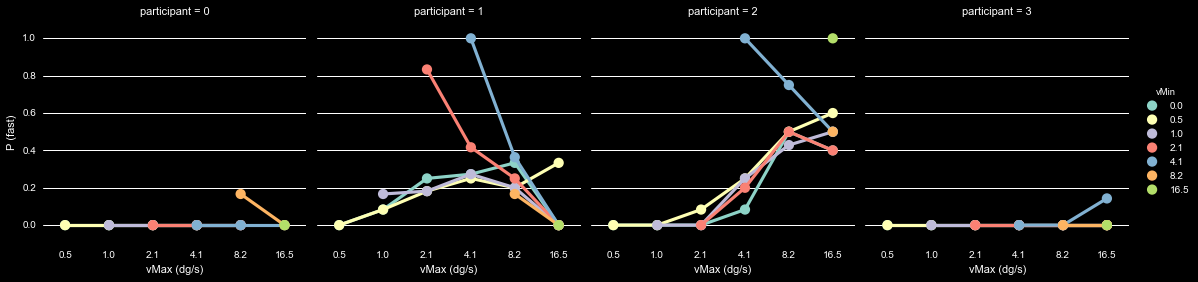

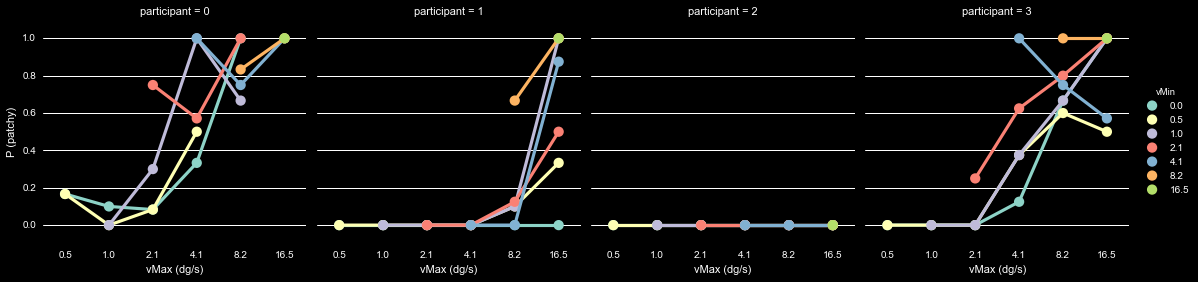

In [110]:
g = sns.factorplot(x='vMax', y='slow', hue='vMin', col='participant', col_wrap=4,
                   data=ssNoRing, ci=None, dodge=.0)
g.set_axis_labels('vMax (dg/s)','P (slow)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='fast', hue='vMin', col='participant', col_wrap=4,
                   data=ssNoRing, ci=None, dodge=.0)
g.set_axis_labels('vMax (dg/s)','P (fast)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='nf090', hue='vMin', col='participant', col_wrap=4,
                   data=ssNoRing, ci=None, dodge=.0)
g.set_axis_labels('vMax (dg/s)','P (patchy)')
plt.ylim(-0.1,1.1)

With maximum velocity increasing, there are fewer instances of slow whole-field motion.

(-0.1, 1.1)

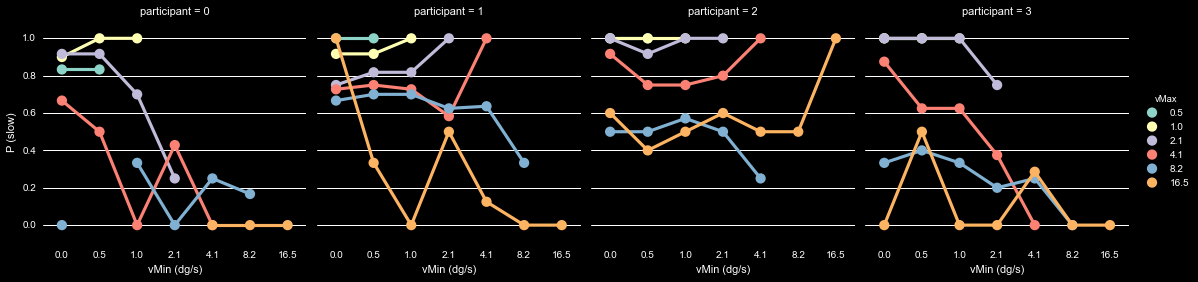

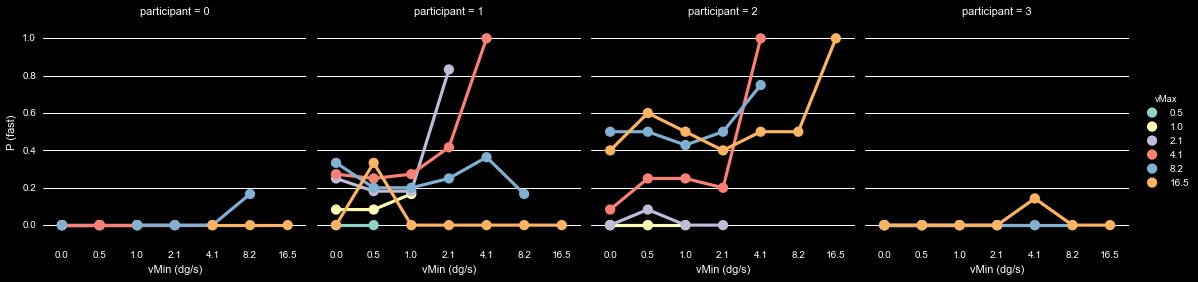

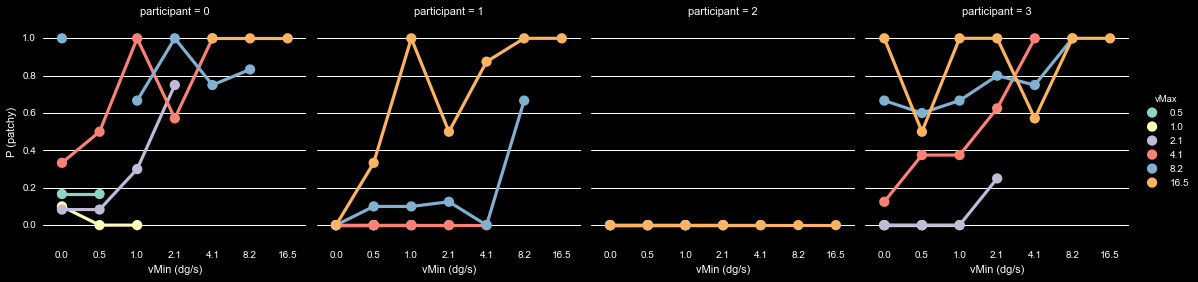

In [109]:
g = sns.factorplot(x='vMin', y='slow', hue='vMax', col='participant', col_wrap=4,
                   data=ssNoRing, ci=None, dodge=.0)
g.set_axis_labels('vMin (dg/s)','P (slow)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMin', y='fast', hue='vMax', col='participant', col_wrap=4,
                   data=ssNoRing, ci=None, dodge=.0)
g.set_axis_labels('vMin (dg/s)','P (fast)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMin', y='nf090', hue='vMax', col='participant', col_wrap=4,
                   data=ssNoRing, ci=None, dodge=.0)
g.set_axis_labels('vMin (dg/s)','P (patchy)')
plt.ylim(-0.1,1.1)

Much less clear what role the minimum motion plays in whole-field trials.

In [41]:
ds.groupby(['participant'],
                     as_index=False)['ringSzDeg'].agg([np.count_nonzero, np.size]).reset_index()

,participant,count_nonzero,size
0,0,288.0,288.0
1,1,288.0,288.0
2,2,288.0,288.0
3,3,192.0,192.0


In [ ]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#x, y = np.meshgrid(ds.vMin, ds.vMax)
#surf = ax.plot_surface(x, y, ds.slow, rstride=1, cstride=1, cmap=cm.coolwarm, 
#                       linewidth=0, antialiased=False)
#plt.show()

# Eye-tracking data

## Data import

In [69]:
subjEtPath = glob.glob(allSubjDirs[6] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
from cili.extract import extract_event_ranges
ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr])
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr])
trialStartStr = [s for s in mess if 'START' in s]
trialStart = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialStartStr])
trialEndStr = [s for s in mess if 'END' in s]
trialEnd = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialEndStr])
trials = pd.DataFrame({'trialN':trialN, 'trialTS':trialTS, 'trialStartTS':trialStart,
                      'trialEndTS':trialEnd})
trials['trialLength'] = trials['trialEndTS'] - trials['trialStartTS']
trials = trials[['trialN', 'trialTS', 'trialStartTS', 'trialEndTS', 'trialLength']]
print np.max(trials['trialLength'])
#print trials.head(5)

IndexError: list index out of range

In [ ]:
# Creating my own ranges for each trial, with N number of samples:
#nSamples = 1500
#ranges = np.zeros((len(trialN),nSamples,6)) # 6 is for all six variables (L/R x,y,pup)
#print trialTS[0]
#print samps.ix[samps.ix>trialTS[0],0]
#print samps.index
#print samps.ix[int(trialTS[0]):int(trialTS[0])+600]
#print trialN
#trialStart = trialN # initiating a new variable to collect the 'actual' start
#trialEnd = trialN # the 'actual' end
#print trialN[-1] == 96
#for t in trialN:
    #print t
    # the actual start is the first data point following a trial time stamp:
    #trialStart[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t-1])]
    #trialStart[t-1] = 
    #print t==trialN[-1]
    #if t != 96: # trialN[-1]: #WHY DOESN'T THIS WORK?!
        #print trialTS[t]
        #trialEnd[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t])]
    #else:
        #trialEnd[t-1] = samps.index[-1]
    #end = trialStart[t-1]+nSamples
    #print end
    #ranges[t,:,:] = samps.ix[beg:end]
    #samps.ix[int(trialTS[int(t)-1]):int(trialTS[int(t)-1]+nSamples)]
#print trialStart
#print trialEnd